In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import os
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

pd.set_option('display.max_colwidth', None)

In [ ]:
projPath = '/content/drive/MyDrive/dsc_261/'
newsPath = os.path.join(projPath, 'datasets/News')
aaplPath = os.path.join(newsPath,'AAPL_News.csv')
PATH_PROJECT = '''/content/drive/MyDrive/dsc_261'''
PATH_DATA = os.path.join(PATH_PROJECT, 'datasets')

aggregated_folder = 'AGGREGATED_DATA'
PATH_AGG_DATA = os.path.join(PATH_DATA, aggregated_folder)

In [ ]:
newsdata = pd.read_csv(aaplPath, encoding='latin-1', parse_dates= [1])
newsdata = newsdata[newsdata['Body'].notna()]
newsdata[:3]

,Date,Title,Body
190,7/8/11,"Analysis: Young startups demand steeper prices from VCs,Wynn Resorts, Apple to beat earnings views-StarMine,CORRECTED-UPDATE 1-TSMC, UMC post lower June sales, lack rebound strength in Q3,PRESS DIGEST - China","SAN FRANCISCO A year ago, Mike Maples's investment firm, Floodgate, was investing in young companies at a pace of two or three every quarter. Now, he's backed just one startup all year and puts a big chunk of the blame on spiraling price tags., NEW YORK, July 8 Wynn Resorts and\rApple are among companies likely to beat earnings\rforecasts for the latest quarter, while Canadian Pacific\rRailways is likely to miss, Thomson Reuters StarMine\rforecasts show., (Corrects headline, lead paragraph to show TSMC, UMC posted,\rnot forecast, lower June sales), BEIJING/SHANGHAI, July 8 Chinese newspapers\ravailable in Beijing and Shanghai carried the following stories\ron Friday. Reuters has not checked the stories and does not\rvouch for their accuracy."
191,7/7/11,"UPDATE 1-Canada eyes Nortel patent sale review- minister,RIM says adds 1 million EMEA subscribers in 3 weeks,Canada eyes Nortel patent sale review- minister,Apple's app downloads race ahead, surpass 15 billion,How about a beer with your iPhone?,UPDATE 5-Samsung Q2 falls as weak LCDs overshadow mobiles,How about a beer with your iPhone?,How about a beer with your iPhone?,Chinese writers to petition Apple over book downloads-report,HTC limit-down on slower demand, corp governance concerns","* Gives no detail on timeline for decision\r (Adds quotes from minister, details),TORONTO BlackBerry maker Research In Motion said on Thursday it has added more than one million subscribers in Europe, the Middle East and Africa in less than three weeks., OTTAWA, July 7 Canadian Industry Minister\rChristian Paradis said on Thursday that officials in his office\rare studying whether to formally review a sale of Nortel\rpatents to ensure investment law was properly applied.,NEW YORK Apple Inc customers downloaded more than 15 billion applications in the past three years, the company said on Thursday, releasing figures that suggest the rate of downloads is sharply accelerating.,MELBOURNE You can do a lot with an iPhone these days -- text, take pictures, surf the net, and even make a phone call., * Estimates Q2 sales at 39 trln won vs 40 trln won consensus,MELBOURNE - You can do a lot with an iPhone these days -- text, take pictures, surf the net, and even make a phone call., MELBOURNE, July 7 - You can do a lot with an\riPhone these days -- text, take pictures, surf the net, and even\rmake a phone call., SHANGHAI, July 7 A group of Chinese authors will\rpetition Apple Inc to stop the distribution of their\rbooks in electronic format through various applications in\rApple's App Store, the 21st Century Herald Tribune reported on\rThursday.,TAIPEI Shares of world No.5 handset maker HTC Corp plunged on Thursday as investor looked beyond the forecast-beating quarterly net profit to concerns over a slowdown in smartphone demand and the company's corporate governance after its plan to acquire S3 Graphics."
192,7/6/11,"UPDATE 1-Samsung estimates Q2 profit down 26 pct,Samsung estimates Q2 profit down 26 pct,Hackers expose flaw in Apple iPad, iPhone software,Hackers expose flaw in Apple iPad, iPhone software","* Sees Q2 op profit at 3.7 trln won vs 3.9 trln won\rconsensus, SEOUL, July 7 Samsung Electronics ,\rthe world's top maker of memory chips and televisions, estimated\rits April-June operating profit would fall 26 percent year on\ryear, as its LCD display business is widely expected to report\ranother loss.,BOSTON Hackers have disclosed a bug in software from Apple Inc that security experts said could be exploited by criminals looking to gain remote control over iPhones, iPads and iPod Touch devices., * They could develop malware that lets them control devices"


Preprocessing the text:

In [ ]:
def cleanPipe(df, text_column):
    df[text_column] = df[text_column].astype(str) # Ensure that the 'Body' column is of type string
    df[text_column] = df[text_column].str.lower() # Convert the text to lowercase
    df['tokenized_words'] = df[text_column].apply(lambda x: word_tokenize(x) if isinstance(x, str) else []) # Tokenize the words
    stop_words = set(stopwords.words('english')) # Set of English stop words
    # Remove non-alphanumeric characters and stop words
    df['cleaned_text'] = df['tokenized_words'].apply(lambda tokens: [word for word in tokens if word.isalnum() and word not in stop_words])
    return df

In [ ]:
newsdata[:1]

,Date,Title,Body
190,7/8/11,"Analysis: Young startups demand steeper prices from VCs,Wynn Resorts, Apple to beat earnings views-StarMine,CORRECTED-UPDATE 1-TSMC, UMC post lower June sales, lack rebound strength in Q3,PRESS DIGEST - China","SAN FRANCISCO A year ago, Mike Maples's investment firm, Floodgate, was investing in young companies at a pace of two or three every quarter. Now, he's backed just one startup all year and puts a big chunk of the blame on spiraling price tags., NEW YORK, July 8 Wynn Resorts and\rApple are among companies likely to beat earnings\rforecasts for the latest quarter, while Canadian Pacific\rRailways is likely to miss, Thomson Reuters StarMine\rforecasts show., (Corrects headline, lead paragraph to show TSMC, UMC posted,\rnot forecast, lower June sales), BEIJING/SHANGHAI, July 8 Chinese newspapers\ravailable in Beijing and Shanghai carried the following stories\ron Friday. Reuters has not checked the stories and does not\rvouch for their accuracy."


In [ ]:
newsdata = cleanPipe(newsdata, 'Body')

In [ ]:
newsdata[newsdata.Title.notna()][:1]

,Date,Title,Body,tokenized_words,cleaned_text
190,7/8/11,"Analysis: Young startups demand steeper prices from VCs,Wynn Resorts, Apple to beat earnings views-StarMine,CORRECTED-UPDATE 1-TSMC, UMC post lower June sales, lack rebound strength in Q3,PRESS DIGEST - China","san francisco a year ago, mike maples's investment firm, floodgate, was investing in young companies at a pace of two or three every quarter. now, he's backed just one startup all year and puts a big chunk of the blame on spiraling price tags., new york, july 8 wynn resorts and\rapple are among companies likely to beat earnings\rforecasts for the latest quarter, while canadian pacific\rrailways is likely to miss, thomson reuters starmine\rforecasts show., (corrects headline, lead paragraph to show tsmc, umc posted,\rnot forecast, lower june sales), beijing/shanghai, july 8 chinese newspapers\ravailable in beijing and shanghai carried the following stories\ron friday. reuters has not checked the stories and does not\rvouch for their accuracy.","[san, francisco, a, year, ago, ,, mike, maples, 's, investment, firm, ,, floodgate, ,, was, investing, in, young, companies, at, a, pace, of, two, or, three, every, quarter, ., now, ,, he, 's, backed, just, one, startup, all, year, and, puts, a, big, chunk, of, the, blame, on, spiraling, price, tags., ,, new, york, ,, july, 8, wynn, resorts, and, apple, are, among, companies, likely, to, beat, earnings, forecasts, for, the, latest, quarter, ,, while, canadian, pacific, railways, is, likely, to, miss, ,, thomson, reuters, starmine, forecasts, show., ,, (, corrects, headline, ,, lead, paragraph, to, show, tsmc, ,, umc, ...]","[san, francisco, year, ago, mike, maples, investment, firm, floodgate, investing, young, companies, pace, two, three, every, quarter, backed, one, startup, year, puts, big, chunk, blame, spiraling, price, new, york, july, 8, wynn, resorts, apple, among, companies, likely, beat, earnings, forecasts, latest, quarter, canadian, pacific, railways, likely, miss, thomson, reuters, starmine, forecasts, corrects, headline, lead, paragraph, show, tsmc, umc, posted, forecast, lower, june, sales, july, 8, chinese, newspapers, available, beijing, shanghai, carried, following, stories, friday, reuters, checked, stories, vouch, accuracy]"


In [ ]:
# # tagged_data = [TaggedDocument(words=row['cleaned_text'], tags=[str(i)]) for i, row in newsdata.iterrows()]

# vector_size = 128
# model = Doc2Vec(vector_size=vector_size, window=2, min_count=1, workers=4, epochs=100)
# model.build_vocab(tagged_data)
# model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
# newsdata['vector'] = newsdata['tokenized_body'].apply(lambda x: model.infer_vector(x))

Convert the news to vector:

In [ ]:
def news2vec(df, vSize):
  tagged_data = [TaggedDocument(words=row['cleaned_text'], tags=[str(i)]) for i, row in df.iterrows()]
  model = Doc2Vec(vector_size=vSize, window=2, min_count=1, workers=4, epochs=100)
  model.build_vocab(tagged_data)
  model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
  df['newsVector'] = df['cleaned_text'].apply(lambda x: model.infer_vector(x))
  return model, df
vector_size = 128

In [ ]:
vector_size = 128
model, newsdata = news2vec(newsdata, vector_size)

In [ ]:
def news2vecmodel(df, vSize, model):
  # tagged_data = [TaggedDocument(words=row['cleaned_text'], tags=[str(i)]) for i, row in df.iterrows()]
  # model = Doc2Vec(vector_size=vSize, window=2, min_count=1, workers=4, epochs=100)
  # model.build_vocab(tagged_data)
  # model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
  df['newsVector'] = df['cleaned_text'].apply(lambda x: model.infer_vector(x))
  return df

In [ ]:
vector_size = 128
newsdata = news2vecmodel(newsdata, vector_size, newsvecmodel)

In [ ]:
newsdata[:1]

,Date,Title,Body,tokenized_words,cleaned_text,newsVector
190,7/8/11,"Analysis: Young startups demand steeper prices from VCs,Wynn Resorts, Apple to beat earnings views-StarMine,CORRECTED-UPDATE 1-TSMC, UMC post lower June sales, lack rebound strength in Q3,PRESS DIGEST - China","san francisco a year ago, mike maples's investment firm, floodgate, was investing in young companies at a pace of two or three every quarter. now, he's backed just one startup all year and puts a big chunk of the blame on spiraling price tags., new york, july 8 wynn resorts and\rapple are among companies likely to beat earnings\rforecasts for the latest quarter, while canadian pacific\rrailways is likely to miss, thomson reuters starmine\rforecasts show., (corrects headline, lead paragraph to show tsmc, umc posted,\rnot forecast, lower june sales), beijing/shanghai, july 8 chinese newspapers\ravailable in beijing and shanghai carried the following stories\ron friday. reuters has not checked the stories and does not\rvouch for their accuracy.","[san, francisco, a, year, ago, ,, mike, maples, 's, investment, firm, ,, floodgate, ,, was, investing, in, young, companies, at, a, pace, of, two, or, three, every, quarter, ., now, ,, he, 's, backed, just, one, startup, all, year, and, puts, a, big, chunk, of, the, blame, on, spiraling, price, tags., ,, new, york, ,, july, 8, wynn, resorts, and, apple, are, among, companies, likely, to, beat, earnings, forecasts, for, the, latest, quarter, ,, while, canadian, pacific, railways, is, likely, to, miss, ,, thomson, reuters, starmine, forecasts, show., ,, (, corrects, headline, ,, lead, paragraph, to, show, tsmc, ,, umc, ...]","[san, francisco, year, ago, mike, maples, investment, firm, floodgate, investing, young, companies, pace, two, three, every, quarter, backed, one, startup, year, puts, big, chunk, blame, spiraling, price, new, york, july, 8, wynn, resorts, apple, among, companies, likely, beat, earnings, forecasts, latest, quarter, canadian, pacific, railways, likely, miss, thomson, reuters, starmine, forecasts, corrects, headline, lead, paragraph, show, tsmc, umc, posted, forecast, lower, june, sales, july, 8, chinese, newspapers, available, beijing, shanghai, carried, following, stories, friday, reuters, checked, stories, vouch, accuracy]","[0.09241724, -0.7398134, -0.92543393, -1.1605442, 0.46057782, 0.026023908, 0.4607773, -0.7957587, -0.74206096, 0.80296004, -0.5389474, 0.26690114, 0.9184835, 0.35436216, -1.6933091, -0.18331824, -1.0546004, 0.28876325, 0.035737045, -0.7329867, 1.0931709, -0.018913781, -0.25476322, 0.13056828, -0.91847616, 0.18674283, -0.059004482, 1.2439412, -0.09980105, -0.1646226, 0.42774433, -0.24950545, -0.24739975, 0.050503124, 0.0065074633, -0.01035881, 1.5163652, -0.90965325, 0.87193954, 0.8550116, -1.0676513, 1.2338961, -0.10255802, -0.519214, 0.0730567, 1.2134128, -0.058912147, -0.12667657, 0.20353565, -0.25925636, 1.2036599, 0.35989964, 1.2450258, -0.5654266, -1.6117039, -0.30889255, 1.6008596, -0.83465326, -1.6967467, -0.06378982, -1.2293272, 0.06660258, -0.34384197, 1.0223347, 1.0364196, -0.78174466, 0.58763975, 1.3199909, -1.7854699, -1.9300573, -0.83219725, -0.30592245, -1.9387677, 0.76365006, -1.6507466, 0.17142183, 0.12976311, 1.5301712, 1.2041975, 0.6396992, -0.35470614, 0.6914483, -2.5206983, -1.6916687, 1.5459012, -0.42421082, 0.18160158, 1.4560448, 0.18091366, -1.4326525, 0.025903367, 1.1903181, 0.071981356, -0.29543748, -0.65523654, -0.5476137, 0.22294201, -0.50519747, -1.9098794, -0.54381293, ...]"


In [ ]:
# newsdata = news2vec(newsdata, vector_size)

Visualizing the vectors:

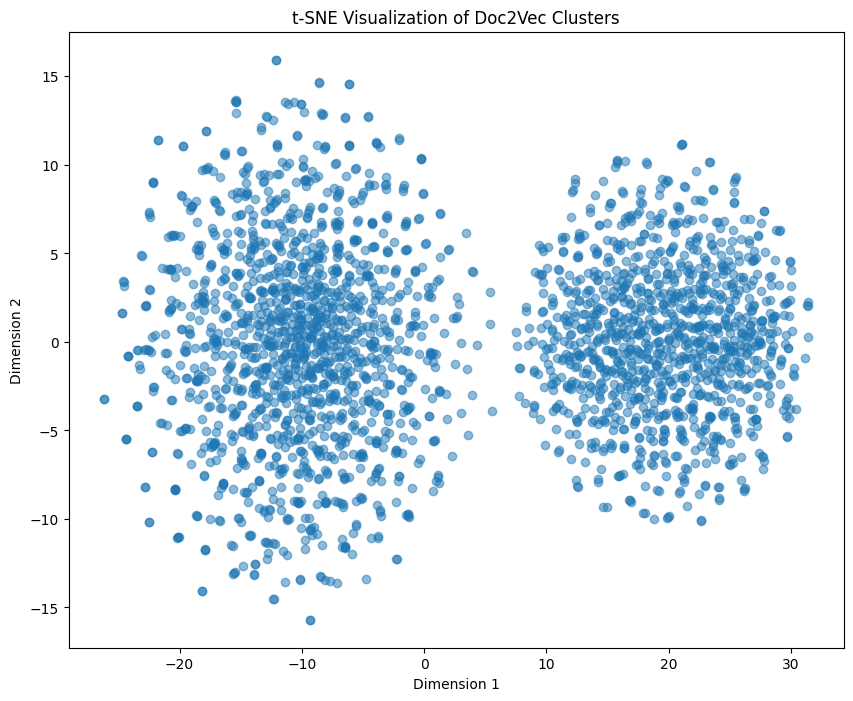

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vectors = np.array(newsdata['newsVector'].to_list())

# Apply t-SNE to reduce dimensionality to 2D
tsne_model = TSNE(n_components=2, random_state=42)
vectors_2d = tsne_model.fit_transform(vectors)

df_tsne = pd.DataFrame(data={'Dimension_1': vectors_2d[:, 0], 'Dimension_2': vectors_2d[:, 1]})

plt.figure(figsize=(10, 8))
plt.scatter(df_tsne['Dimension_1'], df_tsne['Dimension_2'], alpha=0.5)
plt.title('t-SNE Visualization of Doc2Vec Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

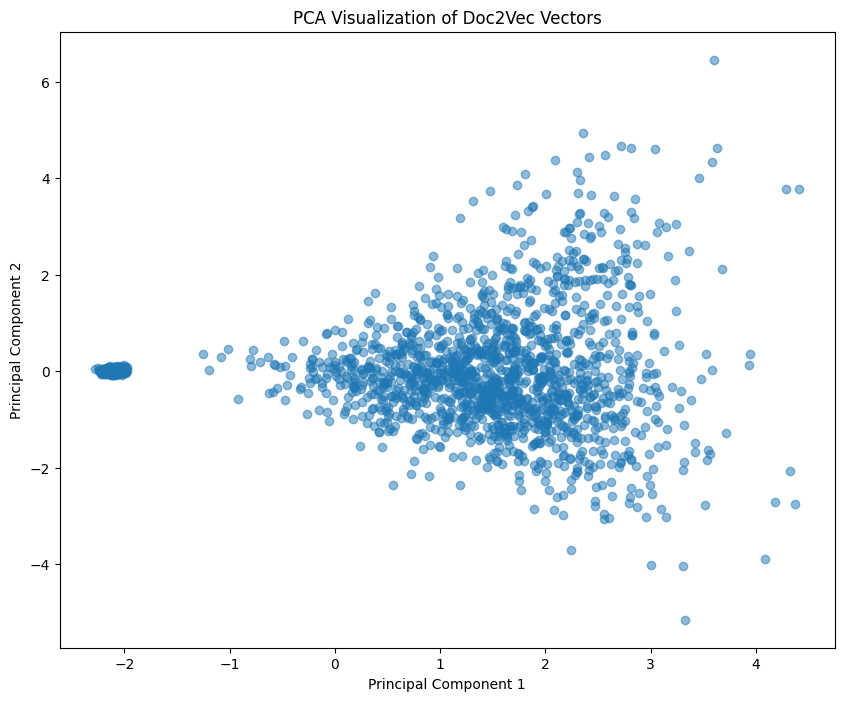

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'newsVector' column contains the Doc2Vec vectors
vectors = newsdata['newsVector'].to_list()

# Apply PCA to reduce dimensionality to 2D
pca_model = PCA(n_components=2)
vectors_2d = pca_model.fit_transform(vectors)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data={'Dimension_1': vectors_2d[:, 0], 'Dimension_2': vectors_2d[:, 1]})

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['Dimension_1'], df_pca['Dimension_2'], alpha=0.5)
plt.title('PCA Visualization of Doc2Vec Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# from sklearn.cluster import KMeans
# import seaborn as sns

# vectors = newsdata['newsVector'].to_list()

# kmeans = KMeans(n_clusters=11, random_state=42)  # You can adjust the number of clusters
# newsdata['cluster'] = kmeans.fit_predict(vectors)


# plt.figure(figsize=(10, 8))
# sns.scatterplot(x=df_pca['Dimension_1'], y=df_pca['Dimension_2'], hue=newsdata['cluster'], palette='viridis', legend='full', alpha=0.8)
# plt.title('K-means Clustering of Doc2Vec Vectors')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()



In [ ]:
newsdata[:3]

In [ ]:
test_data = word_tokenize("dec 22 - the following are the top stories on the business\rpages of british newspapers. reuters has not verified these\rstories and does not vouch for their accuracy.".lower())
v1 = model.infer_vector(test_data)

**Combine Datasets**

In [ ]:
import glob
files = glob.glob(newsPath+'/*News.csv')

In [ ]:
%%capture
df = pd.DataFrame()

for file in files:
    df_temp = pd.read_csv(file, encoding='latin-1', parse_dates=[1])
    df = df.append(df_temp, ignore_index=True)


In [ ]:
df = df[df['Body'].notna()]

In [ ]:
df[:3]

,Date,Title,Body
186,7/7/11,"SPECIAL REPORT-Malaysia's dilemma: Can it reform and discriminate?,Special Report: Can Malaysia reform and discriminate?","PUTRAJAYA, Malaysia, July 7 Dr. Mahathir Mohamad\rsits at a vast desk cluttered with work, hands clasped before\rhim and looking at his visitors with a slight smile.,PUTRAJAYA, Malaysia Dr. Mahathir Mohamad sits at a vast desk cluttered with work, hands clasped before him and looking at his visitors with a slight smile."
187,7/8/11,Special Report: Can Malaysia reform and discriminate?,"PUTRAJAYA, Malaysia Dr. Mahathir Mohamad sits at a vast desk cluttered with work, hands clasped before him and looking at his visitors with a slight smile."
192,7/13/11,"Danielle Chiesi settles SEC insider trading case,UPDATE 3-Danielle Chiesi settles SEC insider trading case","NEW YORK Danielle Chiesi, a former trader who pleaded guilty in the U.S. government's hedge fund insider trading probe, agreed to pay $540,535 to settle related Securities and Exchange Commission civil charges., * Co-defendant Rajaratnam convicted in May\r (Adds new date for Chiesi sentencing)"


In [ ]:
df = cleanPipe(df, 'Body')

In [ ]:
vector_size = 128
newsvecmodel, df = news2vec(df,vector_size)

In [ ]:
df[:3]

,Date,Title,Body,tokenized_words,cleaned_text,newsVector
186,7/7/11,"SPECIAL REPORT-Malaysia's dilemma: Can it reform and discriminate?,Special Report: Can Malaysia reform and discriminate?","putrajaya, malaysia, july 7 dr. mahathir mohamad\rsits at a vast desk cluttered with work, hands clasped before\rhim and looking at his visitors with a slight smile.,putrajaya, malaysia dr. mahathir mohamad sits at a vast desk cluttered with work, hands clasped before him and looking at his visitors with a slight smile.","[putrajaya, ,, malaysia, ,, july, 7, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile., ,, putrajaya, ,, malaysia, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile, .]","[putrajaya, malaysia, july, 7, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, putrajaya, malaysia, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, smile]","[-0.069881, -0.37036842, 0.38023058, 0.03931986, 0.27729076, -0.2460266, 0.2022238, 0.10205019, -0.2835725, 0.27430308, -0.122727685, -0.21889548, 0.10115957, -0.18959276, 0.02464362, 0.29932818, -0.82324547, -0.16352198, -0.24672309, 0.16626944, 0.2372217, 0.031474944, -0.25735193, -0.42484307, -0.30175534, 0.27793804, -0.13934219, 0.37121087, 0.024368815, -0.27987212, -0.35342085, 0.025716953, 0.38541088, 0.5660009, -0.07480348, 0.31831983, 0.2169575, -0.03515144, 0.13470279, -0.22252068, 0.066291906, 0.31673747, 0.11923886, -0.2160713, 0.26810908, 0.1953869, 0.0019802642, -0.14685556, -0.214528, 0.29562488, -0.19394116, 0.443523, -0.3838922, 0.0009543668, -0.54333186, 0.3105893, 0.0745874, -0.23660713, -0.32489482, 0.11236924, -0.34792614, 0.30709994, 0.37298068, -0.046409305, 0.56459403, -0.015116094, 0.4206906, -0.042490445, 0.3962544, -0.4797102, -0.37276766, -0.27160215, -1.002329, -0.23914397, -0.0642549, 0.07421619, -0.18090189, 0.028504776, -0.17518617, 0.28211236, -0.14545074, 0.51392525, -0.3566786, 0.28332627, 0.5829324, 0.5425877, 0.308642, -0.3799582, 0.58362645, -0.25699717, 0.38273662, 0.20451388, -0.51694995, -0.14811212, 0.19241047, -0.3497659, -0.26755798, -0.31083998, -0.28316286, -0.33429742, ...]"
187,7/8/11,Special Report: Can Malaysia reform and discriminate?,"putrajaya, malaysia dr. mahathir mohamad sits at a vast desk cluttered with work, hands clasped before him and looking at his visitors with a slight smile.","[putrajaya, ,, malaysia, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile, .]","[putrajaya, malaysia, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, smile]","[-0.12496548, -0.2318737, 0.18990836, 0.14033745, 0.2927734, 0.07879609, 0.23419519, -0.13267238, -0.21593693, 0.29557648, 0.06818975, -0.28971076, 0.14660722, -0.23548469, 0.035948284, 0.16352704, -0.5729171, -0.05630669, -0.11936374, 0.12360408, 0.16501349, 0.09019202, -0.16117452, -0.38577452, -0.37564558, -0.0013026252, -0.08427289, 0.32424343, -0.13930492, -0.19900881, -0.36879262, 0.005561514, 0.19108337, 0.38184512, 0.16965038, 0.23304343, 0.3337206, -0.070321925, 0.08482234, -0.23303893, 0.10268944, 0.42288902, 0.2143365, -0.15710802, 0.4451357, 0.22939537, 0.15377577, -0.15432143, -0.11094722, 0.2896652, -0.25419632, 0.3900527, -0.180253, -0.059570823, -0.21011408, 0.17362718, -0.004374671, -0.22305438, -0.3559282, 0.08045961, -0.41897917, 0.22234178, 0.39036137, -0.11013016, 0.30132234, -0.017958218, 0.21271013, -0.15776265, 0.28551146, -0.28280297, -0.33827394, -0.20384133, -0.8353042, -0.12349636, -0.00090264, -0.16464634, -0.24465372, -0.10725033, -0.0696182, 0.24530749, -0.30384785, 0.17688653, -0.30733243, 0.31183064, 0.448

In [ ]:
tokens = "jan 28 wells fargo & co and bank of\ramerica corp are working to integrate apple pay into\rtheir atms, techcrunch reported.".split()

new_vector = newsvecmodel.infer_vector(tokens)
sims = newsvecmodel.dv.most_similar([new_vector])

In [ ]:
sims

[('32988', 0.7153812646865845),
 ('57967', 0.624932587146759),
 ('14250', 0.621826171875),
 ('55774', 0.6094062924385071),
 ('27126', 0.606699526309967),
 ('29319', 0.6050602793693542),
 ('17158', 0.5774726867675781),
 ('14558', 0.5734465718269348),
 ('30751', 0.5682535171508789),
 ('49703', 0.5648995637893677)]

In [ ]:
df.loc[57967]

Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

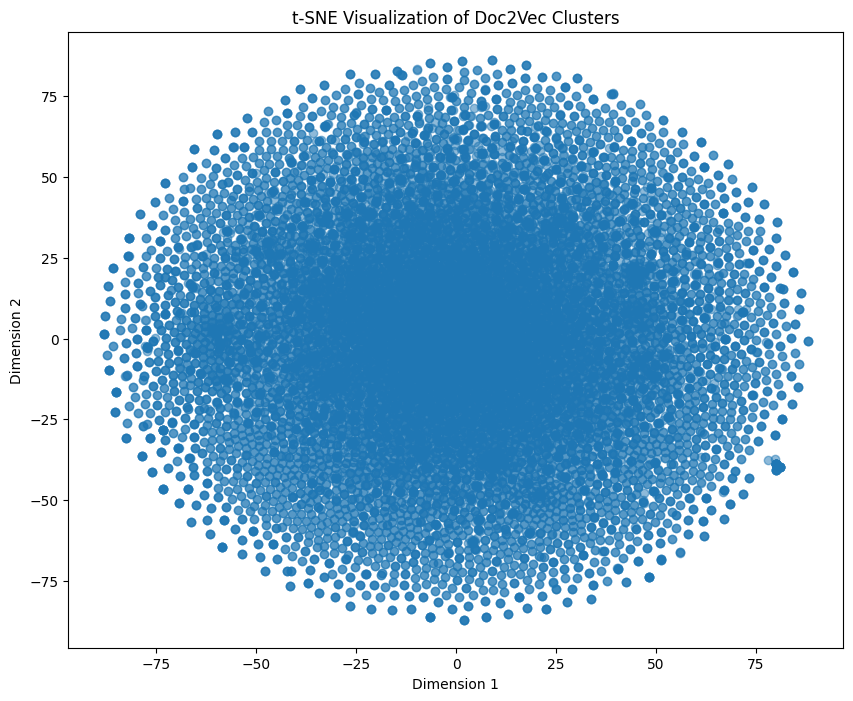

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vectors = np.array(df['newsVector'].to_list())

# Apply t-SNE to reduce dimensionality to 2D
tsne_model = TSNE(n_components=2, random_state=42)
vectors_2d = tsne_model.fit_transform(vectors)

df_tsne = pd.DataFrame(data={'Dimension_1': vectors_2d[:, 0], 'Dimension_2': vectors_2d[:, 1]})

plt.figure(figsize=(10, 8))
plt.scatter(df_tsne['Dimension_1'], df_tsne['Dimension_2'], alpha=0.5)
plt.title('t-SNE Visualization of Doc2Vec Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

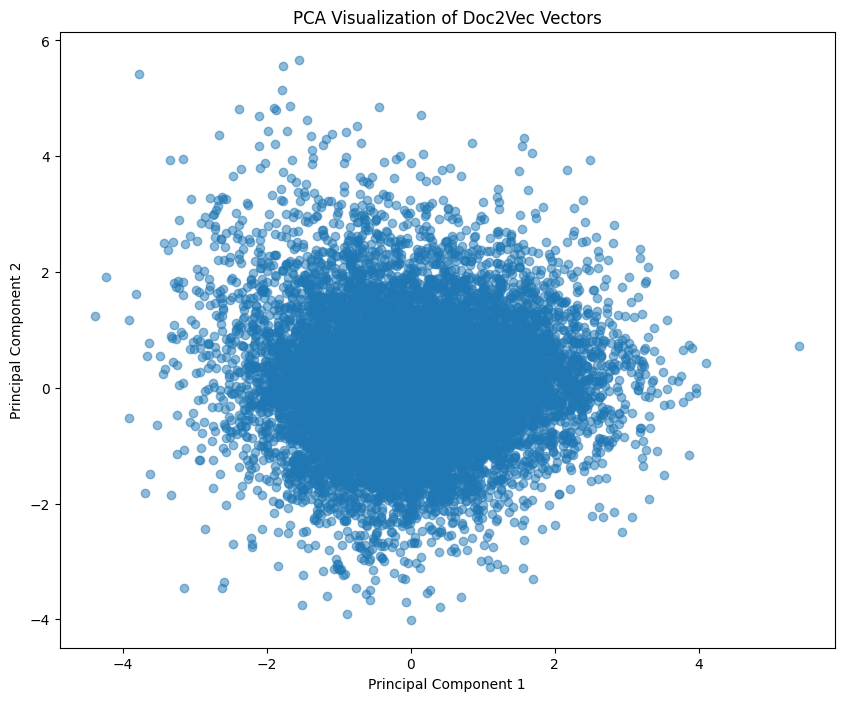

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'newsVector' column contains the Doc2Vec vectors
vectors = df['newsVector'].to_list()

# Apply PCA to reduce dimensionality to 2D
pca_model = PCA(n_components=2)
vectors_2d = pca_model.fit_transform(vectors)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data={'Dimension_1': vectors_2d[:, 0], 'Dimension_2': vectors_2d[:, 1]})

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['Dimension_1'], df_pca['Dimension_2'], alpha=0.5)
plt.title('PCA Visualization of Doc2Vec Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
df[:1]

,Date,Title,Body,tokenized_words,cleaned_text,newsVector
186,7/7/11,"SPECIAL REPORT-Malaysia's dilemma: Can it reform and discriminate?,Special Report: Can Malaysia reform and discriminate?","putrajaya, malaysia, july 7 dr. mahathir mohamad\rsits at a vast desk cluttered with work, hands clasped before\rhim and looking at his visitors with a slight smile.,putrajaya, malaysia dr. mahathir mohamad sits at a vast desk cluttered with work, hands clasped before him and looking at his visitors with a slight smile.","[putrajaya, ,, malaysia, ,, july, 7, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile., ,, putrajaya, ,, malaysia, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile, .]","[putrajaya, malaysia, july, 7, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, putrajaya, malaysia, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, smile]","[-0.2000785, -0.6213604, 0.27324876, -0.2769004, 0.37239173, -0.26795664, -0.042183235, 0.15733469, -0.009823445, 0.08907595, -0.028848242, -0.25014707, -0.16432251, -0.2808422, 0.06250586, 0.20002343, -0.61613375, -0.07971668, -0.13408677, -0.059291083, 0.25092682, 0.050509445, -0.19030386, -0.56807035, -0.33161527, 0.0758963, 0.104699574, 0.32888046, 0.023599567, -0.1691942, -0.10727906, 0.061613772, 0.34708178, 0.5094695, -0.056014054, 0.3264363, 0.43113723, -0.20000714, 0.12503763, -0.17217618, 0.27522075, 0.29073444, 0.1934708, -0.33314103, 0.3096086, -0.032488894, 0.07323904, -0.026024753, -0.21273617, 0.28024387, -0.080042206, 0.44445655, -0.022550106, -0.21659718, -0.4554526, -0.077309385, 0.058960035, -0.20124367, -0.4098343, -0.17440431, -0.39999813, 0.16691089, 0.23526736, 0.11886237, 0.57075316, -0.33064607, 0.39958093, -0.18677054, 0.3548577, -0.6080689, -0.28612494, -0.20602313, -0.7676238, -0.030601084, 0.1046521, 0.038284976, -0.45664313, 0.16476181, -0.06752393, 0.28588533, -0.37306383, 0.20258233, -0.22823982, 0.26549658, 0.4546079, 0.44816786, 0.22455107, -0.4841916, 0.69613457, -0.12055634, 0.18318263, 0.070788644, -0.47187087, -0.0939321, 0.3139565, -0.3098836, -0.53325516, -0.4629029, -0.38066015, -0.30977792, ...]"


Agg Data

In [ ]:
newsfiles = [file for file in os.listdir(newsPath) if '_News.csv' in file]

In [ ]:
import pandas as pd
dfNews = pd.DataFrame()
for file in newsfiles:
  ticker = file.split('_News')[0]
  dfFile = pd.read_csv(os.path.join(newsPath,file), encoding='latin-1', parse_dates=[1])
  dfFile = dfFile[dfFile['Body'].notna()]
  dfFile['ticker'] = ticker
  dfNews = pd.concat([dfNews, dfFile], axis = 0)

<ipython-input-8-b2c2d3d522bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFile['ticker'] = ticker


In [ ]:
def cleanPipeNews(df, text_column):
    df[text_column] = df[text_column].astype(str) # Ensure that the 'Body' column is of type string
    df[text_column] = df[text_column].str.lower() # Convert the text to lowercase
    df['tokenized_words'] = df[text_column].apply(lambda x: word_tokenize(x) if isinstance(x, str) else []) # Tokenize the words
    stop_words = set(stopwords.words('english')) # Set of English stop words
    # Remove non-alphanumeric characters and stop words
    df['cleaned_text'] = df['tokenized_words'].apply(lambda tokens: [word for word in tokens if word.isalnum() and word not in stop_words])
    return df

In [ ]:
dfNews = cleanPipeNews(dfNews, 'Body')

In [ ]:
dfNews[:1]

,Date,Title,Body,ticker,tokenized_words,cleaned_text
186,7/7/11,"SPECIAL REPORT-Malaysia's dilemma: Can it reform and discriminate?,Special Report: Can Malaysia reform and discriminate?","putrajaya, malaysia, july 7 dr. mahathir mohamad\rsits at a vast desk cluttered with work, hands clasped before\rhim and looking at his visitors with a slight smile.,putrajaya, malaysia dr. mahathir mohamad sits at a vast desk cluttered with work, hands clasped before him and looking at his visitors with a slight smile.",T,"[putrajaya, ,, malaysia, ,, july, 7, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile., ,, putrajaya, ,, malaysia, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile, .]","[putrajaya, malaysia, july, 7, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, putrajaya, malaysia, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, smile]"


## GENERATE SENTIMENT LABEL AND SENTIMENT CONFIDENCE SCORE FOR DESIRED **text_clean**:

In [ ]:
dfNews = dfNews[dfNews['Title'].notna()]

In [ ]:
import sys
PATH_UTILITIES = os.path.join(projPath, 'notebooks','src')
sys.path.append(PATH_UTILITIES)

%run $PATH_UTILITIES/'utilities.py'

model="distilbert-base-uncased-finetuned-sst-2-english"
generate_sentiment_label_score(model, dfNews,'Title')

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

,Date,Title,Body,ticker,tokenized_words,cleaned_text,Title sentiment_label,Title sentiment_score
186,7/7/11,"SPECIAL REPORT-Malaysia's dilemma: Can it reform and discriminate?,Special Report: Can Malaysia reform and discriminate?","putrajaya, malaysia, july 7 dr. mahathir mohamad\rsits at a vast desk cluttered with work, hands clasped before\rhim and looking at his visitors with a slight smile.,putrajaya, malaysia dr. mahathir mohamad sits at a vast desk cluttered with work, hands clasped before him and looking at his visitors with a slight smile.",T,"[putrajaya, ,, malaysia, ,, july, 7, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile., ,, putrajaya, ,, malaysia, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile, .]","[putrajaya, malaysia, july, 7, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, putrajaya, malaysia, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, smile]",NEGATIVE,0.993214
187,7/8/11,Special Report: Can Malaysia reform and discriminate?,"putrajaya, malaysia dr. mahathir mohamad sits at a vast desk cluttered with work, hands clasped before him and looking at his visitors with a slight smile.",T,"[putrajaya, ,, malaysia, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile, .]","[putrajaya, malaysia, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, smile]",NEGATIVE,0.987828
192,7/13/11,"Danielle Chiesi settles SEC insider trading case,UPDATE 3-Danielle Chiesi settles SEC insider trading case","new york danielle chiesi, a former trader who pleaded guilty in the u.s. government's hedge fund insider trading probe, agreed to pay $540,535 to settle related securities and exchange commission civil charges., * co-defendant rajaratnam convicted in may\r (adds new date for chiesi sentencing)",T,"[new, york, danielle, chiesi, ,, a, former, trader, who, pleaded, guilty, in, the, u.s., government, 's, hedge, fund, insider, trading, probe, ,, agreed, to, pay, $, 540,535, to, settle, related, securities, and, exchange, commission, civil, charges., ,, *, co-defendant, rajaratnam, convicted, in, may, (, adds, new, date, for, chiesi, sentencing, )]","[new, york, danielle, chiesi, former, trader, pleaded, guilty, government, hedge, fund, insider, trading, probe, agreed, pay, settle, related, securities, exchange, commission, civil, rajaratnam, convicted, may, adds, new, date, chiesi, sentencing]",POSITIVE,0.923182
196,7/18/11,"UPDATE 5-IBM's services signings surge, stock rises,Wall Street drops on global debt woes,Instant view: IBM's Q2 results, signings beat Street,US STOCKS-Wall St drops on global debt woes; banks drag,Analysis: Google antitrust watchers: Place your bets, please,US STOCKS-Wall St falls on U.S. debt, European worries,US STOCKS-Futures point to lower open on U.S. debt concerns,US STOCKS-Futures slump on D.C. debt woes, Halliburton up,US STOCKS-Futures lower on lingering U.S. debt concerns","* sets positive tone for tech earns, corporate spending,new york stocks dropped on monday as bank shares bore the brunt of investor frustration over governments' inability to solve debt crises in the united states and europe. |åê,los angeles international business machines corp reported a surge in signings of new business at its services division during the second quarter, substantially beating wall street expectations and signaling businesses are still spending on technology., * indexes off: dow 0.8 pct, s&p 0.8 pct, nasdaq 0.9 pct,san francisco the u.s. antitrust probe into google inc could hem in its growth ambitions for years, even if regulators do not unle

In [ ]:
dfNews[:1]

,Date,Title,Body,ticker,tokenized_words,cleaned_text,Title sentiment_label,Title sentiment_score
186,7/7/11,"SPECIAL REPORT-Malaysia's dilemma: Can it reform and discriminate?,Special Report: Can Malaysia reform and discriminate?","putrajaya, malaysia, july 7 dr. mahathir mohamad\rsits at a vast desk cluttered with work, hands clasped before\rhim and looking at his visitors with a slight smile.,putrajaya, malaysia dr. mahathir mohamad sits at a vast desk cluttered with work, hands clasped before him and looking at his visitors with a slight smile.",T,"[putrajaya, ,, malaysia, ,, july, 7, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile., ,, putrajaya, ,, malaysia, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile, .]","[putrajaya, malaysia, july, 7, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, putrajaya, malaysia, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, smile]",NEGATIVE,0.993214


##NEWS2VEC Model

In [ ]:
def news2vecmodel(df, vSize, model):
  df['newsVector'] = df['cleaned_text'].apply(lambda x: model.infer_vector(x))
  return df

In [ ]:
dfNews = news2vecmodel(dfNews, 128, model)

In [ ]:
PATH_DATA = os.path.join(projPath, 'datasets')
aggregated_folder = 'AGGREGATED_DATA'
PATH_AGG_DATA = os.path.join(PATH_DATA, aggregated_folder)

dfNews.to_csv(os.path.join(PATH_AGG_DATA, 'news_upd.csv'), index=False)

In [ ]:
dfNews[:1]

,Date,Title,Body,ticker,tokenized_words,cleaned_text,Title sentiment_label,Title sentiment_score,newsVector
186,7/7/11,"SPECIAL REPORT-Malaysia's dilemma: Can it reform and discriminate?,Special Report: Can Malaysia reform and discriminate?","putrajaya, malaysia, july 7 dr. mahathir mohamad\rsits at a vast desk cluttered with work, hands clasped before\rhim and looking at his visitors with a slight smile.,putrajaya, malaysia dr. mahathir mohamad sits at a vast desk cluttered with work, hands clasped before him and looking at his visitors with a slight smile.",T,"[putrajaya, ,, malaysia, ,, july, 7, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile., ,, putrajaya, ,, malaysia, dr., mahathir, mohamad, sits, at, a, vast, desk, cluttered, with, work, ,, hands, clasped, before, him, and, looking, at, his, visitors, with, a, slight, smile, .]","[putrajaya, malaysia, july, 7, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, putrajaya, malaysia, mahathir, mohamad, sits, vast, desk, cluttered, work, hands, clasped, looking, visitors, slight, smile]",NEGATIVE,0.993214,"[-0.43128002, -0.044992156, 0.35421318, 0.69791144, 2.0454502, 0.22456649, 0.04181667, -1.2110509, -1.3019888, -0.16874482, -0.63125294, 0.16102107, 0.7042646, 0.38933775, 1.132165, -0.2827967, -0.5859095, 0.9978036, -1.5827419, 0.52746934, 1.5056385, 0.23308323, 0.7911351, -1.2295763, -0.7435048, -0.0865454, -0.07063456, 1.3202331, 0.22199816, -0.7052423, -0.29932857, -0.48424673, -0.0019138259, -0.93996817, -0.17572038, 1.517001, -1.0768154, 1.2433553, 0.138423, -0.72017294, -0.37677196, 0.6383262, -0.69648457, -0.7835973, 1.6764313, 1.1041447, 0.48788154, -1.3281313, 0.82721925, 1.7692302, -0.09929104, 1.9218304, -0.54531616, 0.23399024, -0.46974996, -0.2917318, -0.4467948, 1.0408245, -1.1518735, 0.19995867, -0.90582436, -0.31347853, 1.2425587, 1.2158998, 1.1897855, 0.35353607, 0.20007977, -0.111648016, -0.26855287, 1.2874044, 1.0597427, -1.0129166, -0.7874137, 0.0016319995, 0.5224386, -0.5740926, -0.28275204, 1.169612, 0.93857574, 0.55038476, -0.76340044, 1.1025856, 0.54486144, 0.16754794, -0.24322253, -0.58916396, 0.69990134, -0.18410236, -0.07591704, -0.50452703, -0.27349967, 0.42996365, 0.17179304, 1.2332125, -0.60832167, -0.48607728, 0.5380988, 0.6035672, -0.21158034, -1.5509163, ...]"
